In [1]:
import os
import torch
import torchvision  # 数据库模块
import torch.nn as nn
from torch.nn import functional as F
from torch.autograd import Variable
from torch.utils import data as Data
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams["axes.labelsize"] = 14
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12

%matplotlib inline



In [2]:
# torch.manual_seed(1)

train训练集大小:  torch.Size([60000, 28, 28])
train标签大小:  torch.Size([60000])


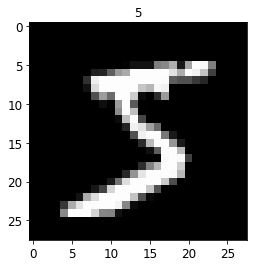

In [8]:
EPOCH = 3 # 训练整批数据多少次, 为了节约时间, 我们只训练一次
LR = 0.001
BATCH_SIZE = 50
DOWNLOAD_MNIST = True   # 如果你已经下载好了mnist数据就写上 Fasle

path = os.path.join(".", "datasets/mnists")
if not(os.path.exists(path)):
    os.mkdir(path)
    DOWNLOAD_MNIST = False
train_data = torchvision.datasets.MNIST(
    path, 
    train=True, 
    transform=torchvision.transforms.ToTensor(),   # 转换 PIL.Image or numpy.ndarray成 torch.FloatTensor of shape (n_c x n_h x n_w) and normalize in the range [0.0, 1.0] 
    download=DOWNLOAD_MNIST
) 

print("train训练集大小: ", train_data.train_data.size()) 
print("train标签大小: ", train_data.train_labels.size())   
# 显示其中的一个样本
plt.imshow(train_data.train_data[0].numpy(), cmap="gray")
plt.title("%i" % train_data.train_labels[0]);


In [9]:
# Data Loader进行mini-batch训练, 每一批图片的shape(50, 1, 28, 28)
train_loader = Data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
# 选择2000张图片，加速测试过程
test_data = torchvision.datasets.MNIST(path, train=False)
# shape from (2000, 28, 28) to (2000, 1, 28, 28), value in range(0,1)
test_x = torch.unsqueeze(test_data.test_data, dim=1).type(torch.FloatTensor)[:2000] / 255
test_y = test_data.test_labels[:2000]

In [10]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # 第一层卷积
        self.conv1 = nn.Sequential(  # 输入图片的尺寸1 * 28 * 28
            nn.Conv2d(
                in_channels = 1,  # 输入图片的通道数n_c
                out_channels = 16, # 过滤器的个数
                kernel_size = 5,   # 过滤器的尺寸
                stride = 1,   # 步长
                padding = 2, #  为了保证输入的尺寸与输出的图片尺寸相同，要保证stride=1情况下，padding=(kernel_size-1)/2  
            ),  # 图片尺寸: 16 * 28 * 28
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),  # 图片的尺寸 16 * 14 * 14
        )
        # 第二层卷积    # 输入图片的尺寸 16 * 14 * 14
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, 5, 1, 2),   # 图片尺寸: 32 * 14 * 14
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),  # 图片尺寸: 32 * 7 * 7
        )
        # 全连接层的输出
        self.output = nn.Linear(32 * 7 * 7, 10)
    
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x) 
        x = x.view(x.size(0), -1)  # 卷积后，经过flatten化,最后输出到全连接层
        output = self.output(x)
        return output, x   # 返回的是一个元组tuple

cnn = CNN()
cnn

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (output): Linear(in_features=1568, out_features=10, bias=True)
)

In [11]:
# 优化过程
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)
loss_func = nn.CrossEntropyLoss()

from matplotlib import cm
try:
    from sklearn.manifold import TSNE
    HAS_SK = True
except:
    HAS_SK = False
    print("Please install sklearn for layer visualization")
    
# 绘图程序
def plot_with_labels(lowDWeights, labels):
    plt.cla()
    X, Y = lowDWeights[:, 0], lowDWeights[:, 1]
    for x, y, s in zip(X, Y, labels):
        c = cm.rainbow(int(255 * s / 9)); plt.text(x, y, s, backgroundcolor=c, fontsize=9)
    plt.xlim(X.min(), X.max()); plt.ylim(Y.min(), Y.max()); plt.title('Visualize last layer'); plt.show(); plt.pause(0.01)

plt.ion()

经过0次训练后，train上的loss值是:2.3051, 测试集上的精度是:0.08


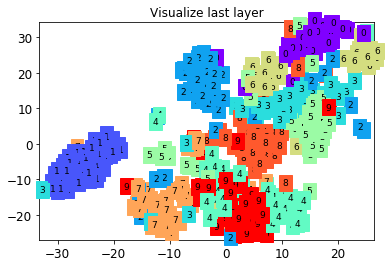

经过50次训练后，train上的loss值是:2.3049, 测试集上的精度是:0.11


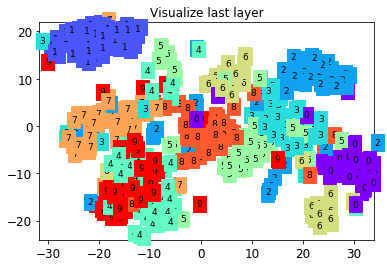

经过100次训练后，train上的loss值是:2.2921, 测试集上的精度是:0.14


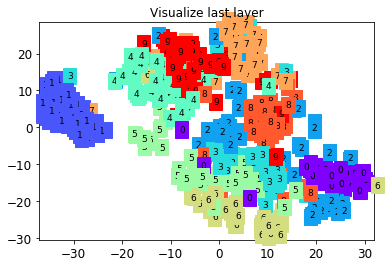

经过150次训练后，train上的loss值是:2.2700, 测试集上的精度是:0.15


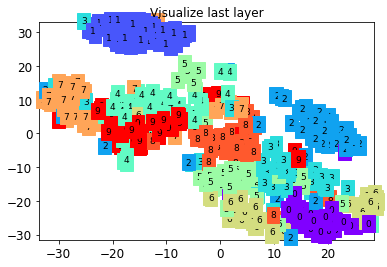

经过200次训练后，train上的loss值是:2.2731, 测试集上的精度是:0.19


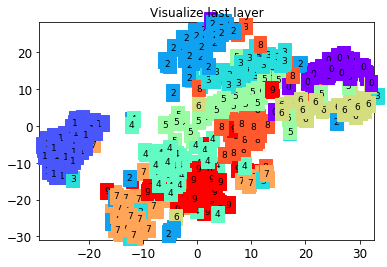

经过250次训练后，train上的loss值是:2.2735, 测试集上的精度是:0.24


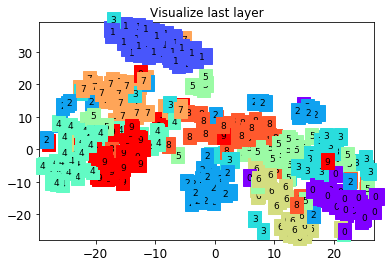

经过300次训练后，train上的loss值是:2.2683, 测试集上的精度是:0.28


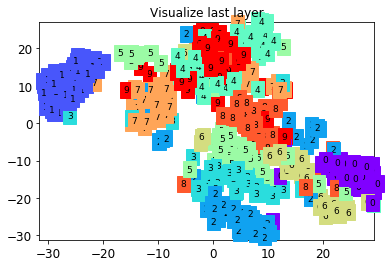

经过350次训练后，train上的loss值是:2.2666, 测试集上的精度是:0.33


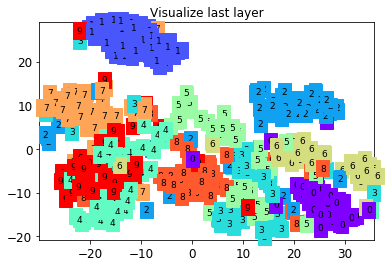

经过400次训练后，train上的loss值是:2.2440, 测试集上的精度是:0.35


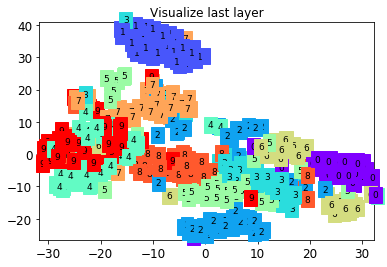

经过450次训练后，train上的loss值是:2.2216, 测试集上的精度是:0.36


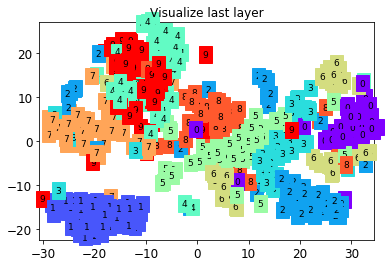

经过500次训练后，train上的loss值是:2.2008, 测试集上的精度是:0.39


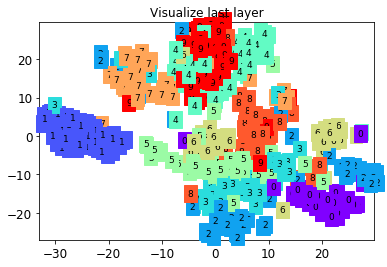

经过550次训练后，train上的loss值是:2.1686, 测试集上的精度是:0.38


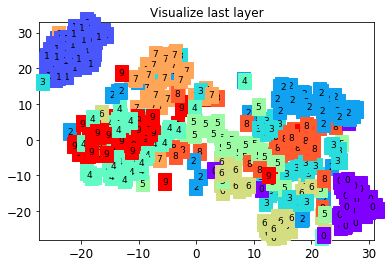

经过600次训练后，train上的loss值是:2.1836, 测试集上的精度是:0.39


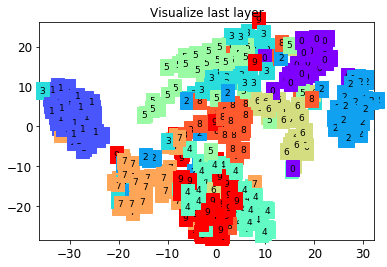

经过650次训练后，train上的loss值是:2.1860, 测试集上的精度是:0.47


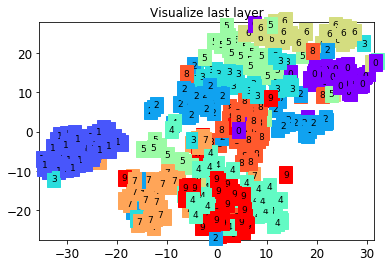

经过700次训练后，train上的loss值是:2.1545, 测试集上的精度是:0.55


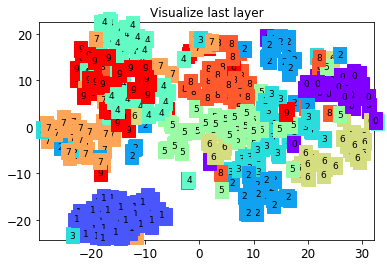

经过750次训练后，train上的loss值是:2.1380, 测试集上的精度是:0.54


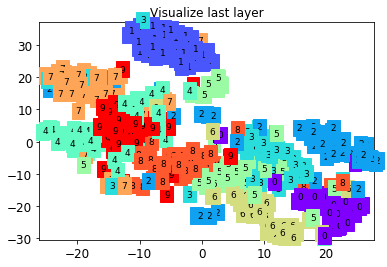

经过800次训练后，train上的loss值是:2.1095, 测试集上的精度是:0.57


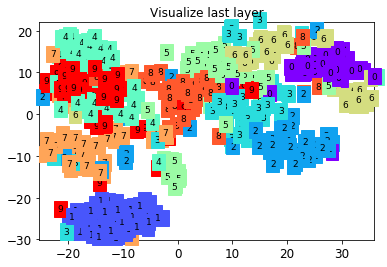

经过850次训练后，train上的loss值是:2.0837, 测试集上的精度是:0.59


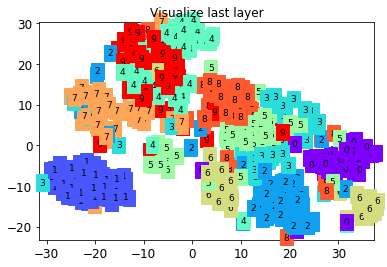

经过900次训练后，train上的loss值是:2.1016, 测试集上的精度是:0.62


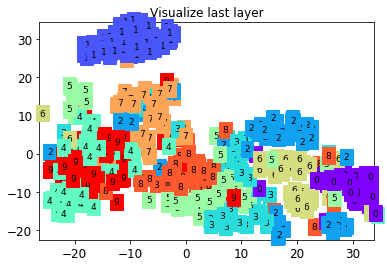

经过950次训练后，train上的loss值是:2.0366, 测试集上的精度是:0.63


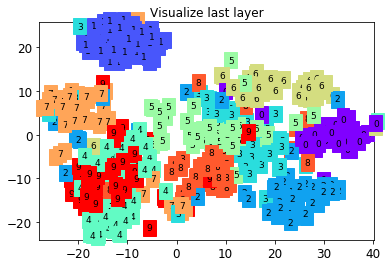

经过1000次训练后，train上的loss值是:2.0490, 测试集上的精度是:0.62


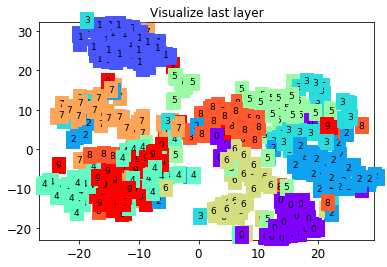

经过1050次训练后，train上的loss值是:2.0092, 测试集上的精度是:0.65


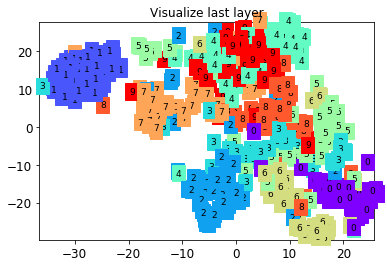

经过1100次训练后，train上的loss值是:1.9220, 测试集上的精度是:0.67


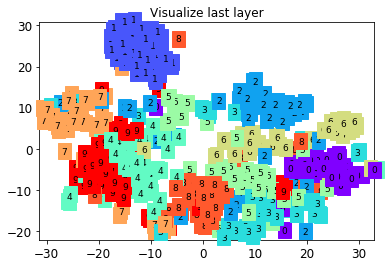

经过1150次训练后，train上的loss值是:1.8921, 测试集上的精度是:0.68


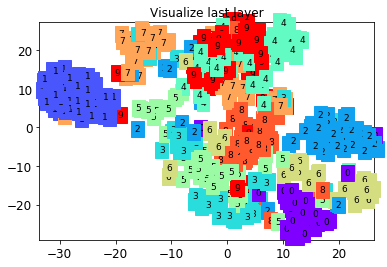

经过0次训练后，train上的loss值是:1.7934, 测试集上的精度是:0.66


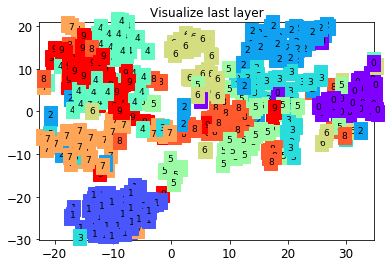

经过50次训练后，train上的loss值是:1.8543, 测试集上的精度是:0.69


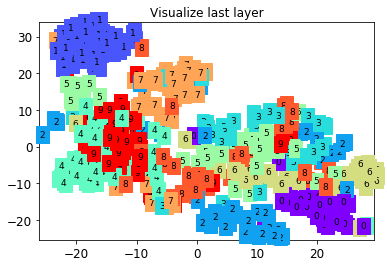

经过100次训练后，train上的loss值是:1.6637, 测试集上的精度是:0.69


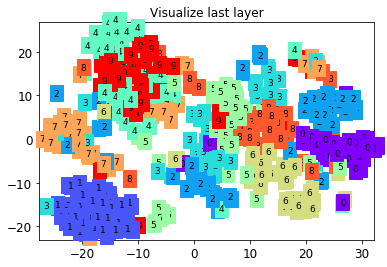

经过150次训练后，train上的loss值是:1.6112, 测试集上的精度是:0.71


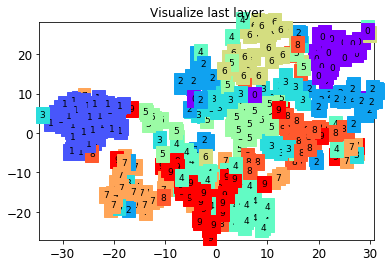

经过200次训练后，train上的loss值是:1.5156, 测试集上的精度是:0.71


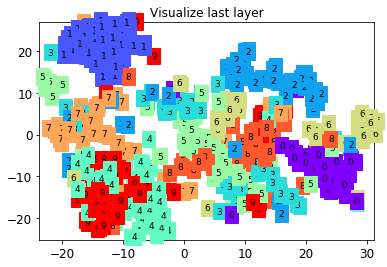

经过250次训练后，train上的loss值是:1.4629, 测试集上的精度是:0.72


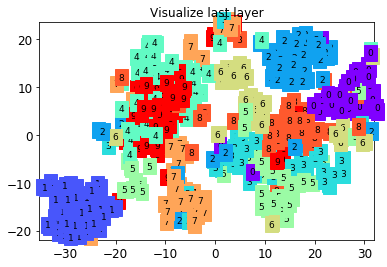

经过300次训练后，train上的loss值是:1.2708, 测试集上的精度是:0.74


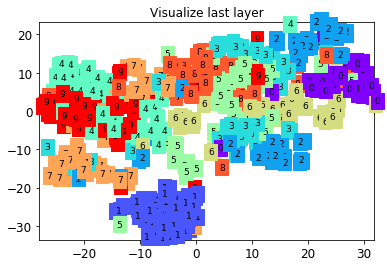

经过350次训练后，train上的loss值是:1.2608, 测试集上的精度是:0.73


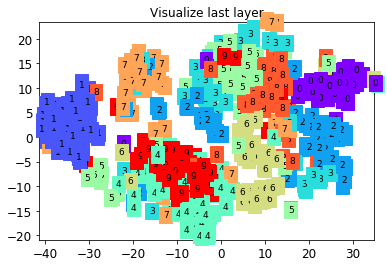

经过400次训练后，train上的loss值是:1.1853, 测试集上的精度是:0.75


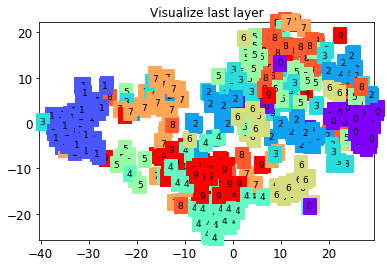

经过450次训练后，train上的loss值是:1.2860, 测试集上的精度是:0.74


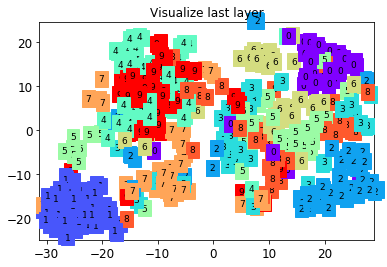

经过500次训练后，train上的loss值是:1.0198, 测试集上的精度是:0.76


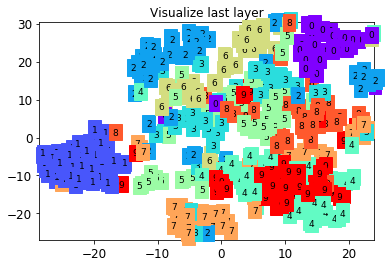

经过550次训练后，train上的loss值是:1.0125, 测试集上的精度是:0.75


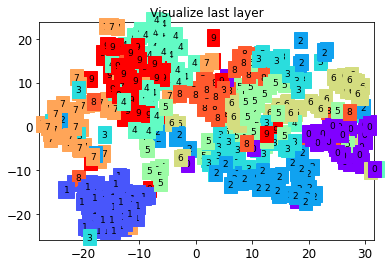

经过600次训练后，train上的loss值是:0.9122, 测试集上的精度是:0.77


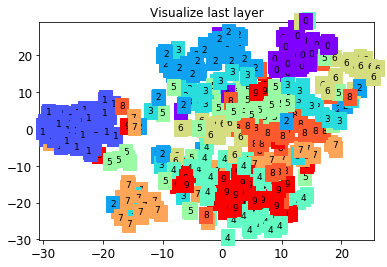

经过650次训练后，train上的loss值是:1.0245, 测试集上的精度是:0.77


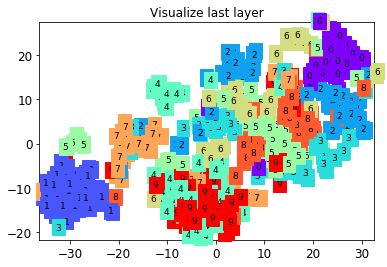

经过700次训练后，train上的loss值是:0.8347, 测试集上的精度是:0.78


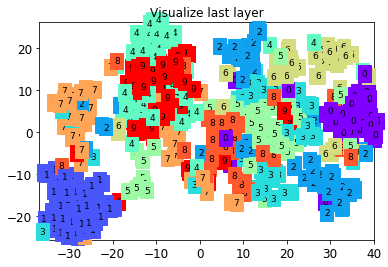

经过750次训练后，train上的loss值是:0.8631, 测试集上的精度是:0.77


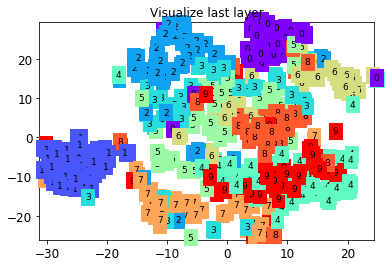

经过800次训练后，train上的loss值是:0.7938, 测试集上的精度是:0.79


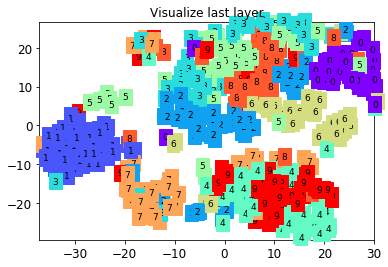

经过850次训练后，train上的loss值是:0.7976, 测试集上的精度是:0.78


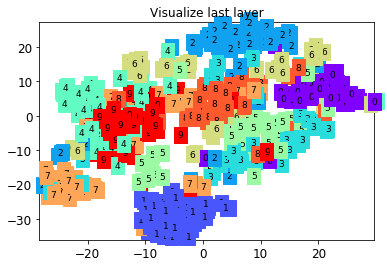

经过900次训练后，train上的loss值是:0.6862, 测试集上的精度是:0.79


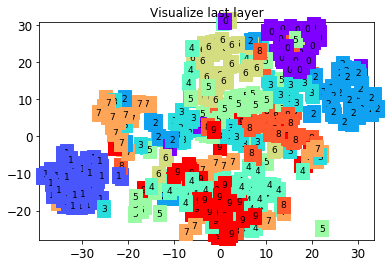

经过950次训练后，train上的loss值是:0.7576, 测试集上的精度是:0.79


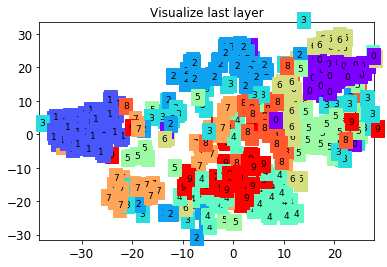

经过1000次训练后，train上的loss值是:0.6245, 测试集上的精度是:0.79


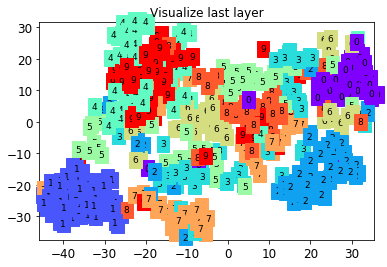

经过1050次训练后，train上的loss值是:0.7860, 测试集上的精度是:0.82


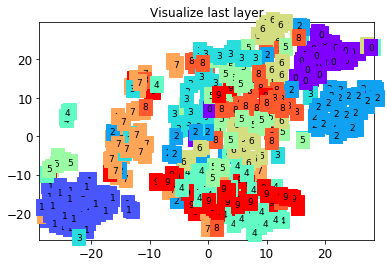

经过1100次训练后，train上的loss值是:0.7034, 测试集上的精度是:0.81


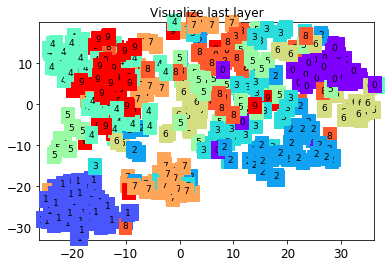

经过1150次训练后，train上的loss值是:0.6008, 测试集上的精度是:0.82


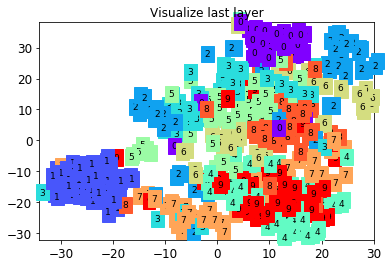

经过0次训练后，train上的loss值是:0.6362, 测试集上的精度是:0.82


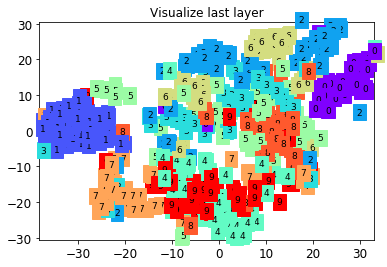

经过50次训练后，train上的loss值是:0.6438, 测试集上的精度是:0.82


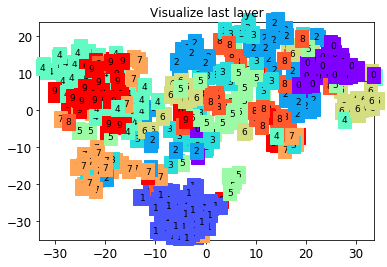

经过100次训练后，train上的loss值是:0.5199, 测试集上的精度是:0.83


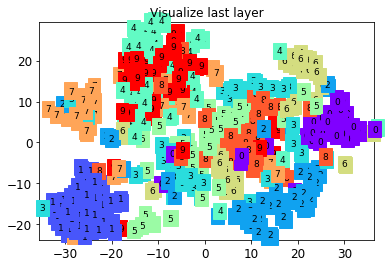

经过150次训练后，train上的loss值是:0.6061, 测试集上的精度是:0.83


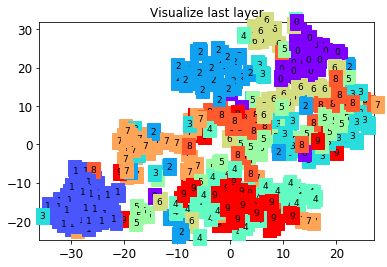

经过200次训练后，train上的loss值是:0.3864, 测试集上的精度是:0.83


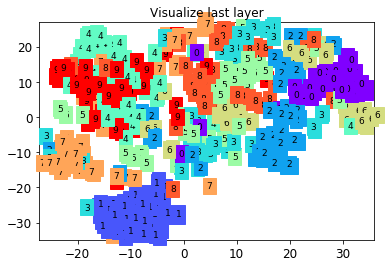

经过250次训练后，train上的loss值是:0.8099, 测试集上的精度是:0.83


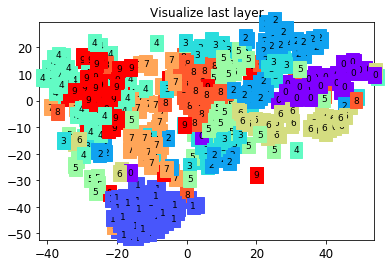

经过300次训练后，train上的loss值是:0.4229, 测试集上的精度是:0.83


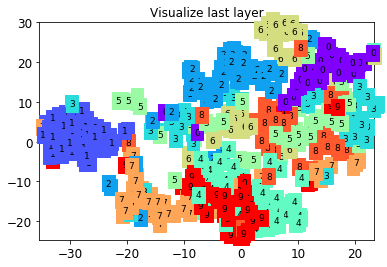

经过350次训练后，train上的loss值是:0.6432, 测试集上的精度是:0.84


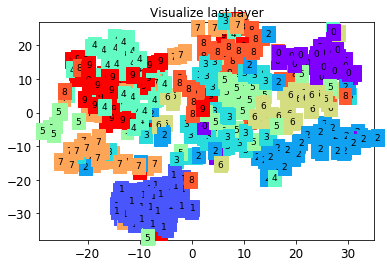

经过400次训练后，train上的loss值是:0.3822, 测试集上的精度是:0.84


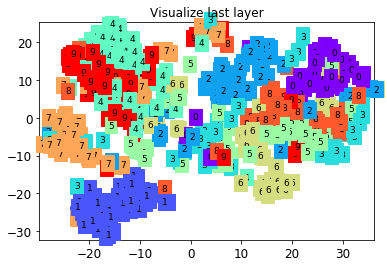

经过450次训练后，train上的loss值是:0.3936, 测试集上的精度是:0.83


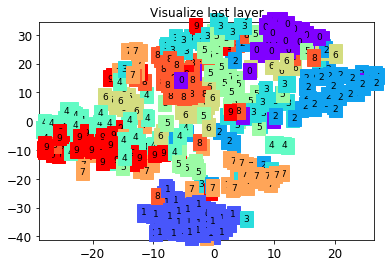

经过500次训练后，train上的loss值是:0.4002, 测试集上的精度是:0.85


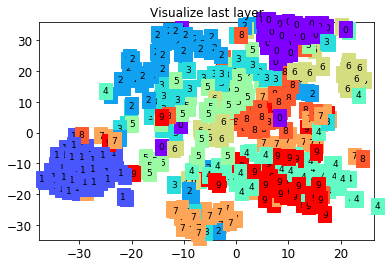

经过550次训练后，train上的loss值是:0.5124, 测试集上的精度是:0.85


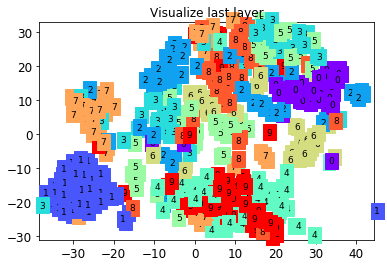

经过600次训练后，train上的loss值是:0.5133, 测试集上的精度是:0.84


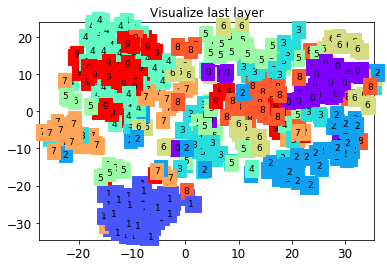

经过650次训练后，train上的loss值是:0.3682, 测试集上的精度是:0.84


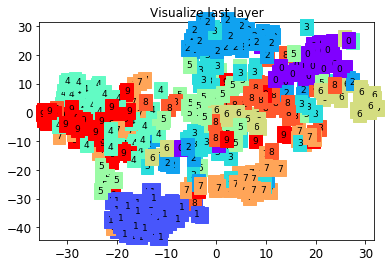

经过700次训练后，train上的loss值是:0.5568, 测试集上的精度是:0.84


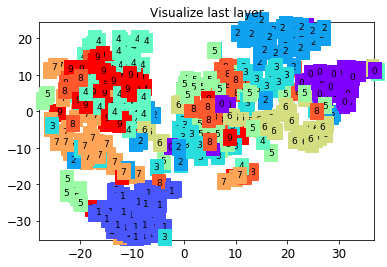

经过750次训练后，train上的loss值是:0.5788, 测试集上的精度是:0.84


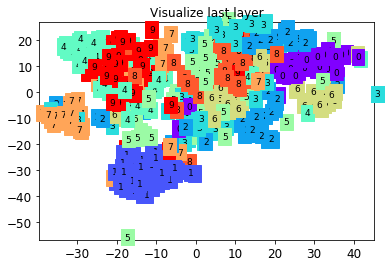

经过800次训练后，train上的loss值是:0.4091, 测试集上的精度是:0.84


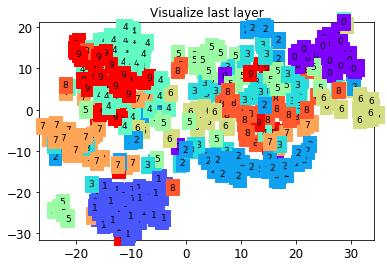

经过850次训练后，train上的loss值是:0.8125, 测试集上的精度是:0.85


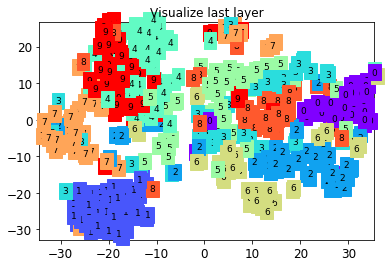

经过900次训练后，train上的loss值是:0.6285, 测试集上的精度是:0.85


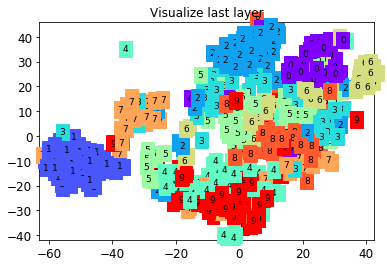

经过950次训练后，train上的loss值是:0.3251, 测试集上的精度是:0.85


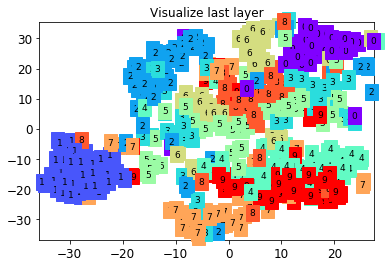

经过1000次训练后，train上的loss值是:0.4553, 测试集上的精度是:0.85


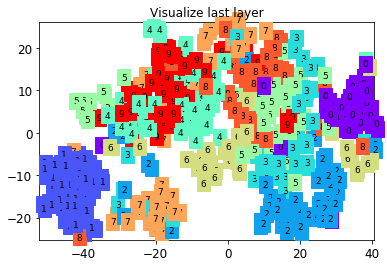

经过1050次训练后，train上的loss值是:0.4270, 测试集上的精度是:0.85


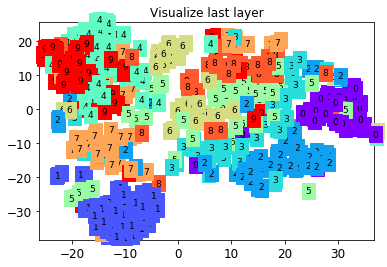

经过1100次训练后，train上的loss值是:0.3697, 测试集上的精度是:0.85


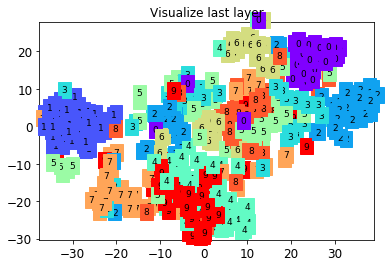

经过1150次训练后，train上的loss值是:0.2572, 测试集上的精度是:0.86


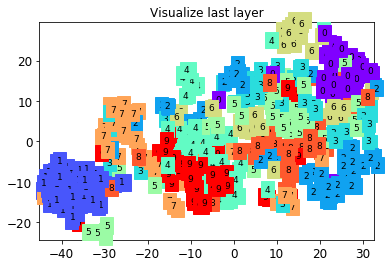

预测数字: [7 2 1 0 4 1 4 9 6 9]
真实数字: [7 2 1 0 4 1 4 9 5 9]


In [12]:
# 开始训练
for epoch in range(EPOCH):
    for step, (batch_x, batch_y) in enumerate(train_loader):
        output = cnn(batch_x)[0]
        loss = loss_func(output, batch_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if step % 50 == 0:
            test_output, last_layer = cnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.numpy()
            accuracy = float((pred_y == test_y.data.numpy()).astype(int).sum()) / float(test_y.size(0))
            print("经过%d次训练后，train上的loss值是:%.4f, 测试集上的精度是:%.2f" % (step, loss.data.numpy(), accuracy))
            if HAS_SK:
                # Visualization of trained flatten layer (T-SNE)
                tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
                plot_only = 500
                low_dim_embs = tsne.fit_transform(last_layer.data.numpy()[:plot_only, :])
                labels = test_y.numpy()[:plot_only]
                plot_with_labels(low_dim_embs, labels)  # 上一个cell中定义的绘图函数
plt.ioff()
                  
test_output, _ = cnn(test_x[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy()
print("预测数字:", pred_y)
print("真实数字:", test_y[:10].numpy())
                  
            